<p>
    Kimberly Matus
    <br>
    IS685

### Data Collection
<p> 
    TITLE: Crimes - 2001 to present
    <br>
    LOCATION: https://catalog.data.gov/dataset/crimes-2001-to-present-398a4/resource/4c948605-0db4-45e8-9c06-c851f05f9f37
    <br>
    SIZE: 1.48 gb
    <br>
</p>
### Hypothesis
<p>
    HYPOTHESIS
    <br> 
    Domestic Battery in Chicago, IL **significantly decreases** when the total amount of Full-Time Police Officers increases.
    <br><BR>
    NULL HYPOTHESIS
    <br>
    Domestic Battery in Chicago, IL **does not significantly decrease** when the total amount of Full-Time Police Officers increases.
    <br>
</p>
### Methodology
<br>
The purpose of this analysis is to determine if an increase in police officers would result in less domestic battery in Chicago, IL (*hereafter Chicago*). Multiple attempts to visualize this **failed**. 
<br><br>
**1)** The attributes 'Primary Type' (*hereafter PT*) and 'Domestic' (*hereafter Dom*) are used in every attempt due to the necessity for sorting. Sort for PT: 'BATTERY' and Dom: True. 
<br>
**2)** The first attempt used only the main attributes and 'Year.' Because the total amount of police officers available were listed for only 2004 and 2008, only these years were selected from the data. This did not allow for visualization - not enough information.
<br>
**3)** The second attempt added the 'Latitude' and 'Longitude' attributes to the prior three. Using 'Longitude' as X and 'Latitude' as y, the shape of Chicago was solidly displayed. Unfortunatley, an outlier was located which implies that either there was a data error, or an event happened outside of Chicago and was recorded. Regardless, the information was not clear enough for analysis.
<br>
**4)** The third attempt removed 'Latitude' and 'Longitude' and added 'District.' The data was then sent to a new dataframe containing only 'District' and the count of the events occuring in each district. The plot displays the difference between 2004 and 2008.
<br><br>
QUICK SYNOPSIS
<br>
Because the data being analyzed is comparing two datasets based on a changed strategy, the best kind of analysis to do would be A/B Testing. However, this data was also not completely sufficient. Results will show that a better dataset should have been selected.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# upload dataset to Jupyter 
df = pd.read_csv('/Users/kmatus/Documents/Python/FinalProject/chicagoILcrimes.csv')

# select 'Primary Type' 'Domestic' 'District' 'Year'
# clean out unwanted columns
no = ['ID',          'Case Number',    'Date',         'Block',
      'IUCR',        'Description',    'Location Description',
      'Arrest',      'Beat',           'Updated On',          
      'Location',    'Ward',           'Community Area',
      'FBI Code',    'Latitude',       'Longitude',      'X Coordinate',   'Y Coordinate']
df.drop(no,inplace=True, axis=1)

# convert district to numeric
df['District'] = pd.to_numeric(df['District']) 

# view first 5 rows of data 
df.head()

,Primary Type,Domestic,District,Year
0,BATTERY,False,11.0,2015
1,OTHER OFFENSE,False,7.0,2015
2,BATTERY,True,2.0,2015
3,BATTERY,False,2.0,2015
4,ROBBERY,False,11.0,2015


In [25]:
# filter for Battery
df1 = df[df['Primary Type'] == 'BATTERY']
# filter for Domestic
df2 = df1[df1['Domestic'] == True]

# filter for 2004
df3 = df2[df2['Year']==2004]
# count occurences by district & store into a new df
df3['District'].value_counts().reset_index().to_csv('dfa.csv', index=False, header=True)
dfa = pd.read_csv('dfa.csv')
# show resulting df
print(dfa.head())

# filter for 2008
df4 = df2[df2['Year']==2008]
# count occurences by district & store into a new df
df4['District'].value_counts().reset_index().to_csv('dfb.csv', index=False, header=True)
dfb = pd.read_csv('dfb.csv')
# show resulting df
print(dfb.head())

   index  District
0    7.0      3116
1    3.0      2959
2    6.0      2794
3    5.0      2424
4    8.0      2332
   index  District
0    7.0      3107
1    3.0      2663
2    8.0      2656
3   11.0      2293
4   25.0      2156


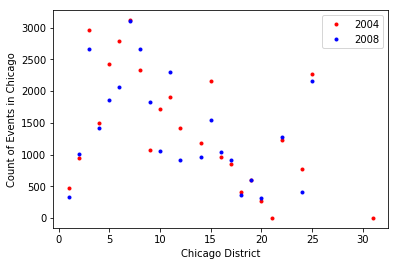

In [26]:
# plot the total events per district in years 2004 (red) and 2008 (blue)
X1, y1 = dfa['index'], dfa['District']
X2, y2 = dfb['index'], dfb['District']
_ = plt.plot(X1, y1, marker='.', linestyle='none', color='red')
_ = plt.plot(X2, y2, marker='.', linestyle='none', color='blue')
_ = plt.xlabel('Chicago District')
_ = plt.ylabel('Count of Events in Chicago')
_ = plt.legend(('2004', '2008'))
plt.show()

-57.935363716038566 2160.971516213847
-41.116020755634885 1897.6860710231886


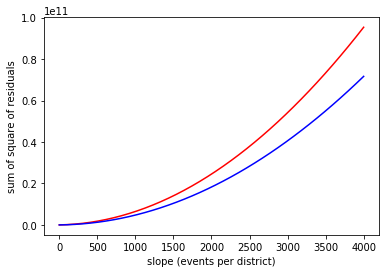

In [34]:
# use risidual sum of squares to fit data to a linear regression
slope1, intercept1 = np.polyfit(X1, y1, 1)
print(slope1, intercept1)
slope2, intercept2 = np.polyfit(X2, y2, 1)
print(slope2, intercept2)

# determine slopes
vals1 = np.linspace(0, 4000, 40)
vals2 = np.linspace(0, 4000, 40)

# declare rss
rss1 = np.empty_like(vals1)
rss2 = np.empty_like(vals2)

# determine sum of squares
for i, a in enumerate(vals1):
    rss1[i] = np.sum((y1 - a * X1 - intercept1)**2)
for i, a in enumerate(vals2):
    rss2[i] = np.sum((y2 - a * X2 - intercept2)**2)
    
# plot both rss values
plt.plot(vals1, rss1, '-', color='red')
_ = plt.plot(vals2, rss2, '-', color='blue')
plt.xlabel('slope (events per district)')
plt.ylabel('sum of square of residuals')

plt.show()


### Conclusion
<p>
    The data selected was not ideal for determining if an increase in police officers would result in less domestic battery in Chicago. There are too many unknowns:
    <br><br>
    LIMITATIONS <br>
    (1) Total Police Officers working during Events
    <br>
    (2) Physical Distance between Police Officers and Events aka 'Response Time'
    <br>
    (3) Population Size in 2004 and 2008
    <br>
    (4) Reported Events vs Unreported Events
    <br><br>
    It is rather unrealistic to declare that an increase in police will lower the total occurences of domestic battery. The reality is that people cannot be controlled, and having more people attempting to enforce the law doesn't change what people do behind closed doors.
    <br><br>
    There are, however, positive theories to the results of the data: **either (A) people are reporting domestic battery more as time goes on, thereby lowering future instances, or (B) increasing police forces allows for more coverage and better response times, thereby lowering future instances.**
    <br><br>
    FUTURE RESEARCH
    <br> 
    It might prove highly beneficial to seek out the other factors that could have led to the increase in reported battery assault cases. In addition, seeking out the outlier may improve existing statistics for Chicago.
    </p>
    
### Police Officer Information 
<p>
    Total Full-Time Police Officers in Chicago, IL 2004: **13,129**
    <br>
    ----Source Title: Census of State and Local Law Enforcement Agencies, 2004
    <br>
    ----Source Location: https://www.bjs.gov/content/pub/pdf/csllea04.pdf
    <br><br>
    Total Full-Time Police Officers in Chicago, IL 2008: **13,354** 
    <br>
    ----Source Title: Census of State and Local Law Enforcement Agencies, 2008
    <br>
    ----Source Location: https://www.bjs.gov/content/pub/pdf/csllea08.pdf
    <br>
</p>